In [1]:
from ssaModel import *

In [2]:
# Setup some fenics log stuff to output diagnostic information
set_log_level(00)
set_log_active(False)

# Set simulation parameters
DT = 8640000 #100 days
Nx = 2**8    # Number of points in the x-direction
Lx = 200e3/1 # Length of domain in the x-direction
DX = Lx/Nx
NT = 100

# Set ice shelf parameters for Erebus
accum = -2./time_factor # m/s
H0 = 434.          # Ice thickness at the grounding line (m)
U0 = 95./time_factor # Velocity of ice at the grounding line (m/a)
B = (2.54e-17/time_factor)**(-1./3.)
# Lx = -H0*U0/accum - 1e-6
Lx = 18000
print(Lx)

18000


Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax
Calving to Lmax


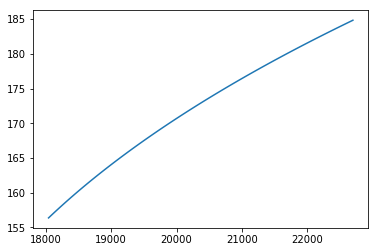

('Length of the velocity array:', 100)
('Length of the positions array:', 100)


In [3]:
# Initialize model
mesh = IntervalMesh(Nx, 0.0, Lx)
fbmkwargs={'Lx':Lx,
           'N0':1000,
           'Nf':10,
           'xsep':20,
           'fbm_type':None}

ssaModel = ssa1D(mesh, order=1, U0=U0, H0=H0, B=B,
                 advect_front=True, calve_flag=False,
                 fbm_type=None, fbmkwargs=fbmkwargs,
                 Lmax=-H0*U0/accum - 1e-6);

del mesh
x, H, U = ssaModel.steady_state(accum)
H, U = ssaModel.init_shelf(accum)
ssaModel.H = H
ssaModel.U = U


U_for_times = [] #Velocity 
Lx_for_times = [] #Lx for a bunchof times 
for Nt in range(100):
#     ssaModel.Lx = ssaModel.U.vector().get_local()*DT
    H, U = ssaModel.integrate(H,U,dt=DT,Nt=1,accum=1e-16);
    Lx_for_times.append(ssaModel.Lx)
    U_for_times.append(ssaModel.U(ssaModel.Lx)*time_factor)
plt.plot(Lx_for_times,U_for_times)
plt.show()
print("Length of the velocity array:",len(U_for_times))
print("Length of the positions array:",len(Lx_for_times))
# print(steps2)
# print(steps1)

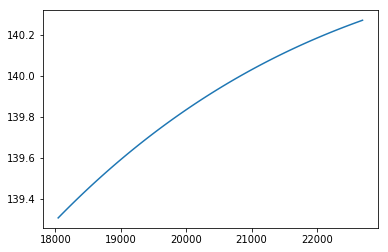

In [4]:
%run analytictongue.py 

erebus = AnalyticTongue(h0=H0, u0=U0, mdot=MDOT, n=N, A=A, rhow=RHOW, rhoi=RHOI, g=G)
u = erebus.u(np.array(Lx_for_times)) #changed from list to array 
plt.plot(Lx_for_times,u)
plt.show()